<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysisPt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS 3**

## **0 Inizializzazione**

In [4]:
import networkx as nx
import pandas as pd
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline 

In [6]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [7]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [22]:
nodes = G.nodes()
edges = G.edges()
#labels = nx.get_node_attributes(G, 'name')
bridges_g = nx.bridges(G)
bridges= []
for edge in bridges_g:
  bridges.append(edge)

# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
pos = nx.spring_layout(G, k=0.15, iterations=125)

In [10]:
bridges

[('115', '198'), ('35', '49'), ('70', '197'), ('163', '162'), ('175', '195')]

In [16]:
ed = list(edges)
len(ed)

2742

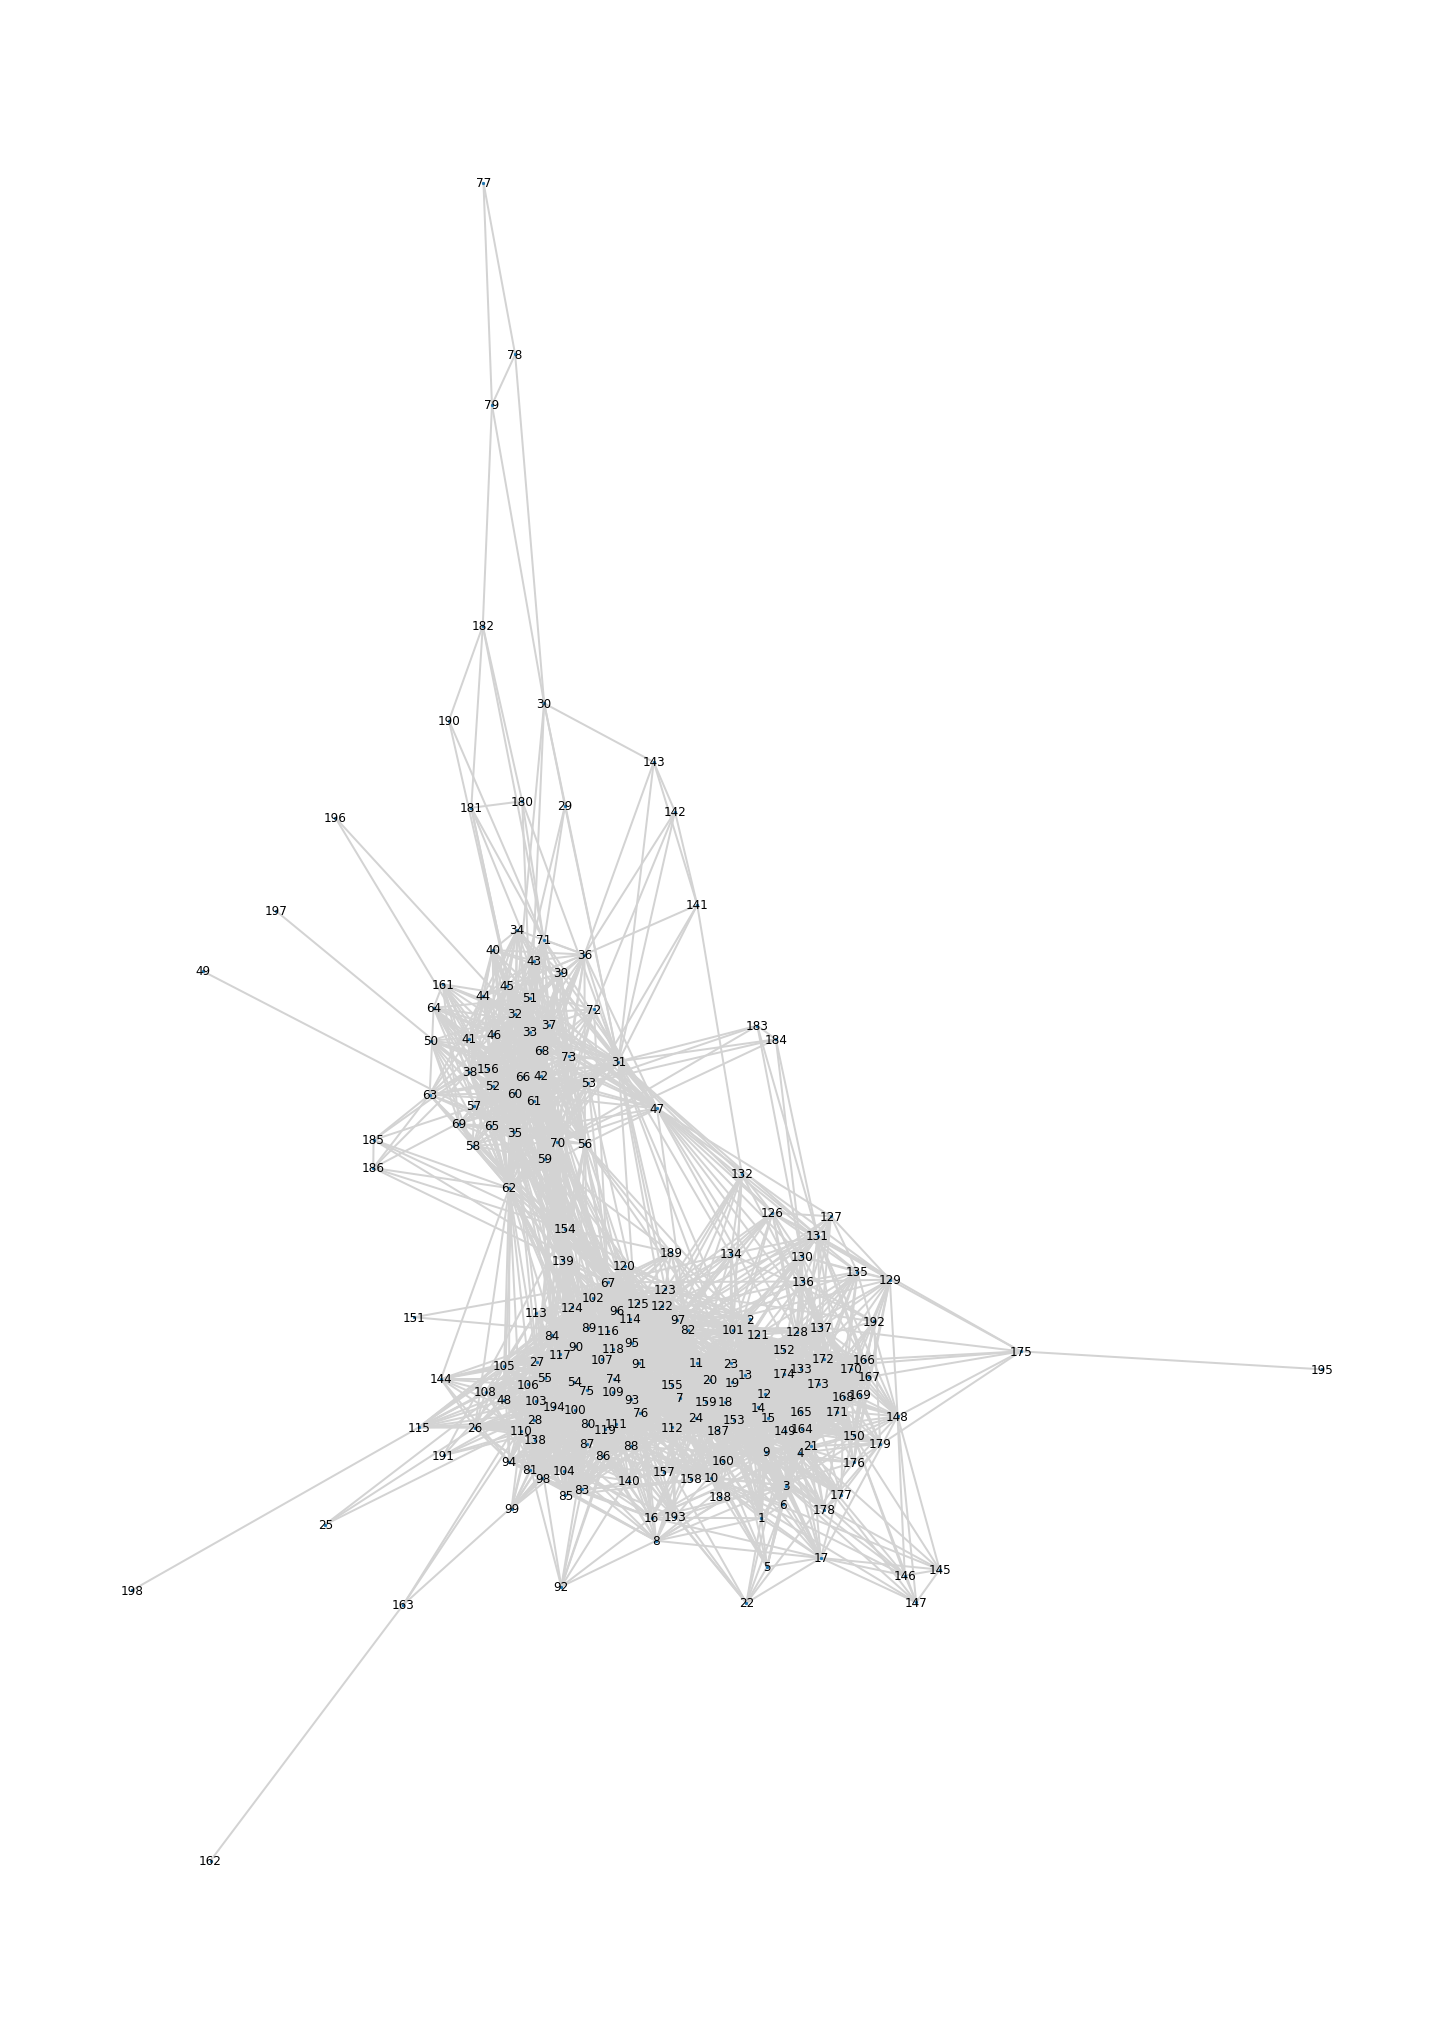

In [20]:
plt.figure(figsize=(20,28.2))
nx.draw(G, pos, node_size=5, font_size=12,edge_color=["red" if (int(edge[0]), int(edge[1])) in edges else "lightgrey" for edge in bridges], width=2, with_labels=True)
plt.show()

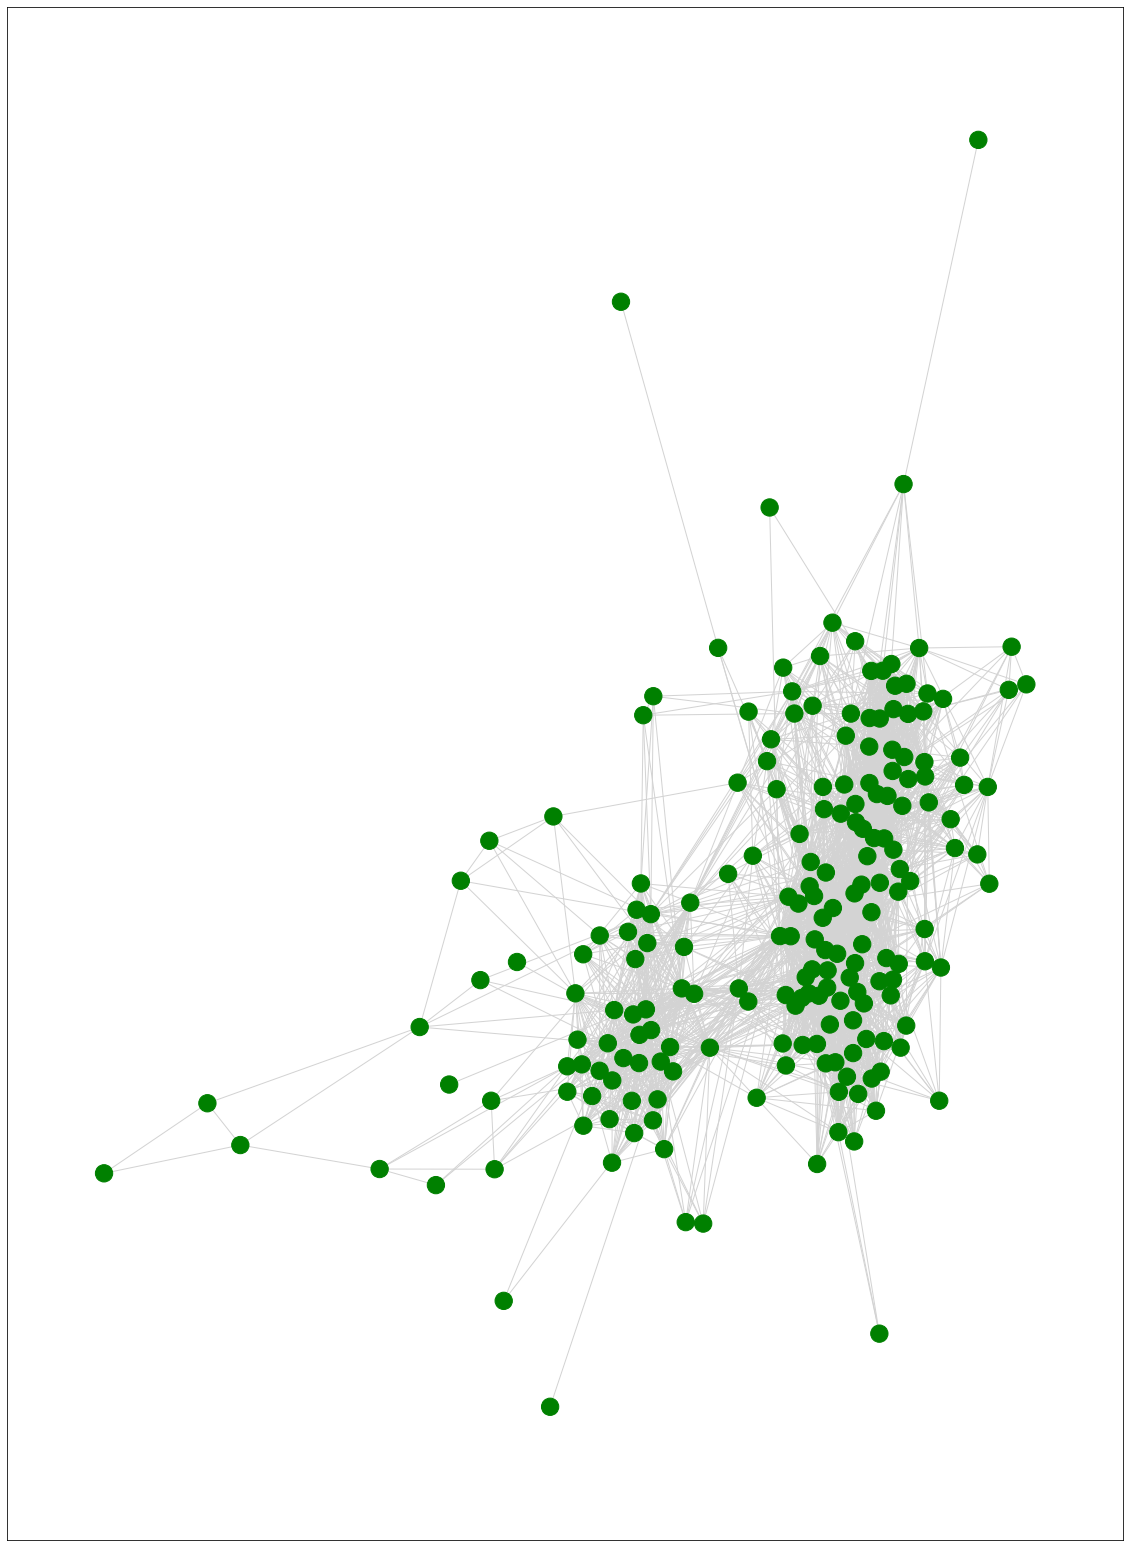

In [25]:
node_colors = ['green' for node in G.nodes()]
edge_colors = ['red' if (int(edge[0]), int(edge[1])) in bridges else 'lightgrey' for edge in edges]
plt.figure(figsize=(20,28.2))
coord = nx.spring_layout(G, k=0.55, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
plt.show()